In [1]:
#No. of dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt


Load Dataset


In [3]:
dataset=pd.read_csv('loan_approval_dataset.csv')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
#first 5 rows of the dataset
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
#last 5 rows and columns of the dataset
dataset.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [7]:
dataset.shape

(4269, 13)

In [8]:
dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


number of missing values in the each column

In [10]:
#No. of Null Values
dataset.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [11]:
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
#dependent column values
dataset[' no_of_dependents'].value_counts()

 no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

Data Visualization



<Axes: xlabel=' education', ylabel='count'>

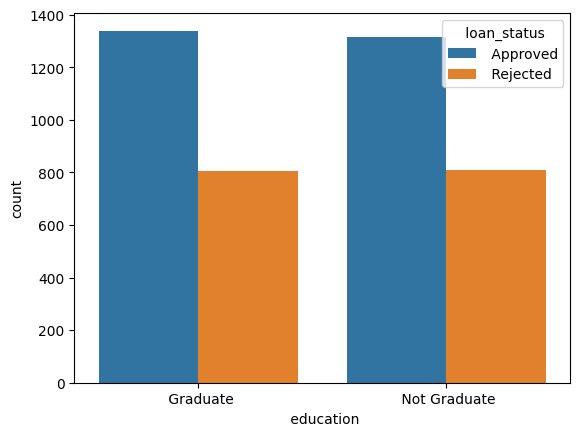

In [13]:
## education & Loan Status
sns.countplot(x=' education',hue=' loan_status',data=dataset)

In [14]:
#Conversion of non-numerical value into numerical values
dataset[' loan_status']=dataset[' loan_status'].map({' Rejected':0,' Approved':1})
dataset[' education']=dataset[' education'].map({' Not Graduate':0,' Graduate':1})

In [15]:
# separating the data and label
dataset['asset_value']=dataset[' residential_assets_value']+dataset[' commercial_assets_value']+dataset[' luxury_assets_value']+dataset[' bank_asset_value']
dataset.drop(['loan_id',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value'],axis=1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,asset_value
0,2,1,No,9600000,29900000,12,778,1,50700000
1,0,0,Yes,4100000,12200000,8,417,0,17000000
2,3,1,No,9100000,29700000,20,506,0,57700000
3,3,1,No,8200000,30700000,8,467,0,52700000
4,5,0,Yes,9800000,24200000,20,382,0,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,Yes,1000000,2300000,12,317,0,7400000
4265,0,0,Yes,3300000,11300000,20,559,1,20000000
4266,2,0,No,6500000,23900000,18,457,0,39000000
4267,1,0,No,4100000,12800000,8,780,1,28800000


In [16]:

# Map 'Yes' and 'No' in 'self_employed' column to 1 and 0
dataset[' self_employed'] = dataset[' self_employed'].map({' Yes': 1, ' No': 0})


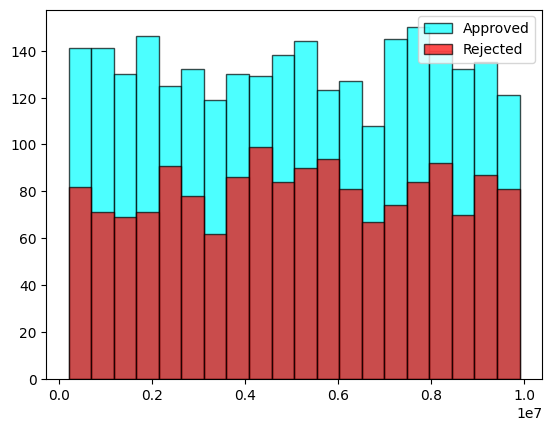

In [17]:
plt.hist(dataset[dataset[' loan_status']==1][' income_annum'],color='cyan',edgecolor='black',bins=20,alpha=0.7,label='Approved')
plt.hist(dataset[dataset[' loan_status']==0][' income_annum'],color='red',edgecolor='black',bins=20,alpha=0.7,label='Rejected')
plt.legend(loc='upper right')
plt.show()

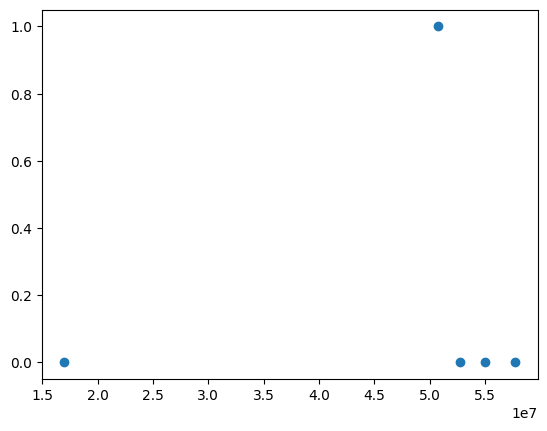

In [18]:
## asset value  & Loan Status
plt.scatter(dataset['asset_value'].head(),dataset[' loan_status'].head())

In [19]:
dataset[dataset[' loan_status']==1]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,asset_value
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000
6,7,5,1,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,1,70800000
8,9,0,1,1,800000,2200000,20,782,1300000,800000,2800000,600000,1,5500000
10,11,4,1,1,2900000,11200000,2,547,8100000,4700000,9500000,3100000,1,25400000
13,14,2,1,1,9100000,31500000,14,679,10800000,16600000,20900000,5000000,1,53300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,4262,3,1,1,3000000,7500000,6,881,1400000,4500000,6100000,2300000,1,14300000
4263,4264,3,1,0,5000000,12700000,14,865,4700000,8100000,19500000,6300000,1,38600000
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,20000000
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,28800000


In [20]:
dataset[dataset[' loan_status']==0]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,asset_value
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000
5,6,0,1,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0,33900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4259,5,1,1,9700000,22600000,16,346,23500000,12900000,26800000,13000000,0,76200000
4259,4260,0,0,1,4500000,11500000,14,509,13400000,2300000,15400000,5900000,0,37000000
4262,4263,5,1,0,1300000,3000000,20,540,1000000,2300000,3200000,1900000,0,8400000
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0,7400000


([<matplotlib.patches.Wedge at 0x2a6d74e3b90>,
 [Text(-0.41186725769241783, 1.0199830204669722, 'Approved'),
  Text(0.4118671036792618, -1.0199830826571863, 'Rejected ')],
 [Text(-0.22465486783222788, 0.5563543748001666, '62.22%'),
  Text(0.22465478382505188, -0.5563544087221015, '37.78%')])

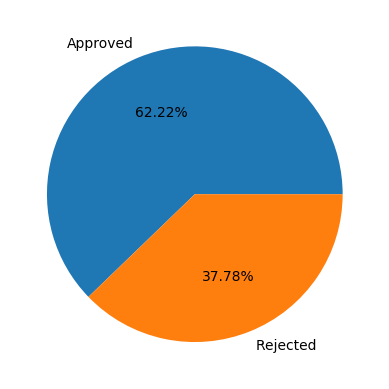

In [21]:
plt.pie(dataset[' loan_status'].value_counts(),labels=['Approved','Rejected '],autopct="%1.2f%%")

In [22]:
X = dataset.drop([' no_of_dependents', ' loan_status','loan_id'],axis=1)
Y = dataset[' loan_status']

In [23]:
print(X)

       education   self_employed   income_annum   loan_amount   loan_term  \
0              1               0        9600000      29900000          12   
1              0               1        4100000      12200000           8   
2              1               0        9100000      29700000          20   
3              1               0        8200000      30700000           8   
4              0               1        9800000      24200000          20   
...          ...             ...            ...           ...         ...   
4264           1               1        1000000       2300000          12   
4265           0               1        3300000      11300000          20   
4266           0               0        6500000      23900000          18   
4267           0               0        4100000      12800000           8   
4268           1               0        9200000      29700000          10   

       cibil_score   residential_assets_value   commercial_assets_value  \


In [24]:
print(Y)

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name:  loan_status, Length: 4269, dtype: int64


Model Training

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(4269, 11) (3415, 11) (854, 11)


In [27]:
print(Y.shape, Y_train.shape, Y_test.shape)

(4269,) (3415,) (854,)


Training the Mode:

In [28]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




classifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

LRAcc = accuracy_score(Y_pred,Y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       331
           1       0.61      1.00      0.76       523

    accuracy                           0.61       854
   macro avg       0.81      0.50      0.38       854
weighted avg       0.76      0.61      0.47       854

[[  1 330]
 [  0 523]]
LR accuracy: 61.36%


c:\Users\goyal\Desktop\loan\myEnv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [30]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [31]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.6254758418740849


In [32]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [33]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.6135831381733021


In [34]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()

In [35]:
regressor.fit(X_train,Y_train)

DecisionTreeClassifier()

In [36]:
Y_pred=regressor.predict(X_test)
Y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [37]:
from sklearn.metrics import r2_score
score=r2_score(Y_pred,Y_test)
score

0.8960516553834741

In [38]:
print('Decision Tree Classifier accuracy: {:.2f}%'.format(score*100))
print('Logistic Regression accuracy: {:.2f}%'.format(test_data_accuracy*100))

Decision Tree Classifier accuracy: 89.61%
Logistic Regression accuracy: 61.36%


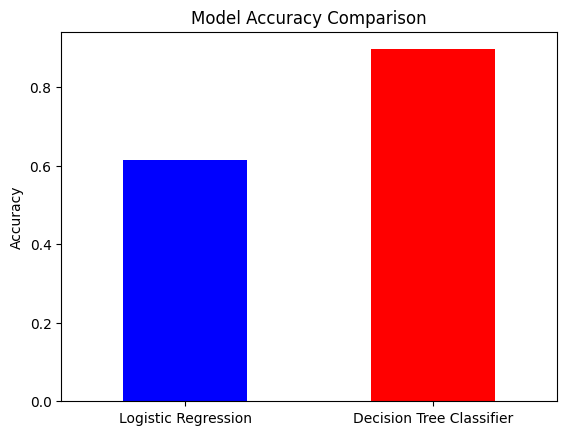

In [39]:
pd.Series([test_data_accuracy,score]).plot(kind='bar', color=['blue', 'red'], title='Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(ticks=[0, 1], labels=['Logistic Regression', 'Decision Tree Classifier'], rotation=0)
plt.show()

In [40]:
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,asset_value
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000


In [41]:
dataset.columns = dataset.columns.str.strip()

In [42]:
input_data = {
    ' education': input("Education (1/0): "),
    ' self_employed': input("Self Employed? (1/0): "),
    ' income_annum': float(input("Applicant Income: ")),
    ' loan_amount': float(input("Loan Amount: ")),
    ' loan_term': float(input("Loan Term (in days): ")),
    ' cibil_score': float(input("CIBIL Score: ")),
    ' residential_assets_value': float(input("Residential Assets Value: ")),
    ' commercial_assets_value': float(input("Commercial Assets Value: ")),
    ' luxury_assets_value': float(input("Luxury Assets Value: ")),
    ' bank_asset_value': float(input("Bank Asset Value: ")),
    'asset_value': float(input("Total Asset Value: "))
}

# Convert to DataFrame
user_df = pd.DataFrame([input_data])

# Ensure column order matches training data
user_df = user_df[[
    ' education', ' self_employed', ' income_annum',
    ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value',
    ' commercial_assets_value', ' luxury_assets_value',
    ' bank_asset_value', 'asset_value'
]]

# Make prediction
prediction = regressor.predict(user_df)[0]
result = 'Loan Approved' if prediction == 1 else 'Loan Rejected'
print(f"\n Prediction Result: {result}")




 Prediction Result: Loan Rejected


In [43]:
import sklearn
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)


numpy 2.0.2
pandas 2.2.2
sklearn 1.6.1


In [44]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(regressor, file)